# Heart Disease Detection

Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease, heart rhythm problems (arrhythmia) and heart defects you’re born with (congenital heart defects), among others.

Heart disease is one of the biggest causes of morbidity and mortality among the population of the world. Prediction of cardiovascular disease is regarded as one of the most important subjects in the section of clinical data science. The amount of data in the healthcare industry is huge.

In this Data Science Project I will be applying Machine Learning techniques to classify whether a person is suffering from Heart Disease or not.

Dataset :- https://www.kaggle.com/ronitf/heart-disease-uci

In [1]:
#import libraries
import numpy as np #2 perform mathematical operations on arrays
import pandas as pd #for data analysis
import seaborn as sns #statistical graphics

from sklearn.linear_model import LogisticRegression #predict the propability of a categorical dependent variable
from sklearn.model_selection import train_test_split #measure the accuracy of the model 
from sklearn.metrics import accuracy_score #measure model performance
from sklearn.model_selection import cross_val_score #statistical method used to estimate the performance (or accuracy) of machine learning models

Data Collection and Processing

In [2]:
#load the dataset 2 pandas data frame for manupulating the data
data = pd.read_csv('heart.csv', encoding = 'latin-1')

#now v hv 2 replace null values with null string otherwise it will show errors
#v will store this in variable claaed "data"
heart_data = data.where((pd.notnull(data)), '')

#lets check the shape of the dataset
heart_data.shape

(303, 14)

In [3]:
#lets c sample of this dataset in pandas data frame
#first 10 rows of the dataset
heart_data.head(10)

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
#last 10 rows of the dataset
heart_data.tail(10)

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#dataset informations
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ï»¿age    303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#data preprocessing 2 check whether if there r any empty values
#checking the number of missing values in each column
heart_data.isnull().sum()

ï»¿age      0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#statistical measures about the data
heart_data.describe()

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Counterplot
Showing the total count of heart diseased and normal patients in counterplot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


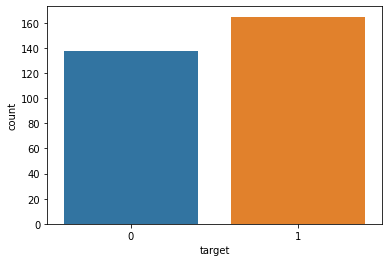

In [7]:
#lets plot the data 
sns.countplot(heart_data['target'])

In [9]:
#checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

0 --> Healthy Heart

1 --> Defective Heart

Splitting the Features and Target

Data Preprocessing

In [10]:
#separate the data and Label
#assigning data(age, sex, cp, ......, thal) as x
#v r droping the target column
#as v r droping the column v need 2 mention axis = 1
X = heart_data.drop(columns = 'target', axis = 1)

#assigning label(target) as y
#v r binarize this values (i want this quality 2 b 2 values --> 0 / 1)
Y = heart_data['target']

In [12]:
print(X)
print("-----------------------------------------------------------------------------------")
print(Y)

     ï»¿age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0        63    1   3       145   233  ...      0      2.3      0   0     1
1        37    1   2       130   250  ...      0      3.5      0   0     2
2        41    0   1       130   204  ...      0      1.4      2   0     2
3        56    1   1       120   236  ...      0      0.8      2   0     2
4        57    0   0       120   354  ...      1      0.6      2   0     2
..      ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298      57    0   0       140   241  ...      1      0.2      1   0     3
299      45    1   3       110   264  ...      0      1.2      1   0     3
300      68    1   0       144   193  ...      0      3.4      1   2     3
301      57    1   0       130   131  ...      1      1.2      1   1     3
302      57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]
---------------------------------------------------------------------------

Train & Test Split

In [13]:
#spliting the dataset in2 Training & Testing

#test size --> 2 specify the percentage of test data needed ==> 0.2 ==> 20%

#random state --> specific split of data each value of random_state splits the data differently, v can put any state v want
#v need 2 specify the same random_state everytym if v want 2 split the data the same way everytym

#stratifying it based on the y, so that the data is split in the crt way
#stratify --> for crt distribution of data as of the original data(2 split the data correctly as of the original data)
#if i dont mention stratify = y, the distribution of 0 & 1 can b very different in the training data & testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [14]:
#lets c how many examples r there for each cases
#checking dimensions of data
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [15]:
#lets c how many examples r there for each cases
#checking dimensions of label
print(Y.shape, Y_train.shape, Y_test.shape)

(303,) (242,) (61,)


## Our data is ready to be applied a machine learning algorithm

# ***Logistic Regression***

### Implementing Logistic Regression without scaling

In [16]:
#loading the logistic regression 2 the variable "model"
#training the Logistic Regression Model with Training Data
#v r fitting the data x_train, y_train 2 the model which is the logistic regression model, so the model is trained with the data
model = LogisticRegression().fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## **Evaluation of the model**

## Predicting seen data with our Logistic Regression ML model

In [17]:
#prediction on train_data
X_train_prediction = model.predict(X_train)
X_train_prediction

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

## Predicting unseen data with our Logistic Regression ML model

In [18]:
#prediction on test_data
X_test_prediction = model.predict(X_test)
X_test_prediction

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1])

## Checking Accuracy of Logistic Regression ML model with training data and testing data

In [19]:
#v r finding the accuracy_score on the training data 2 check how the model performs on traing data 
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

#v r finding the accuracy_score on the testing data 2 check how the model performs on testing data 
#prediction on train_data
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [20]:
#print the accuracy_score on training data
print('Accuracy on Training data : ', training_data_accuracy)

#print the accuracy_score on testing data
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  0.8512396694214877
Accuracy score on Test Data :  0.819672131147541


## Logistic Regression ML model Score

In [21]:
#mean accuracy (accuracy score)
#measuring the accuracy of the model against the training data 
model.score(X_train, Y_train)

0.8512396694214877

In [22]:
#mean accuracy (accuracy score)
#measuring the accuracy of the model against the test data 
model.score(X_test, Y_test)

0.819672131147541

Lets Cross Validate and Check how the model performs.

In [23]:
#cross validation
#it is used to protect against overfitting in a predictive model, 
#particularly in a case where the amount of data may be limited. In cross-validation, 
#you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.
#cv = 5 ==> partition the data in2 4 Training & 1 Testing Data parts
print(cross_val_score(model, X, Y, cv = 5))

[0.81967213 0.86885246 0.81967213 0.85       0.75      ]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Making a Predictive System

In [24]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


# Summary
So this is how we can build a Heart disease detection model using Machine Learning and the Python programming language. I hope you liked this project on how to build a credit card fraud detection model with Machine Learning.

# Saving the trained model

In [25]:
import pickle #keeps track of the objects it has already serialized ==> allows saving model in very little tym

In [26]:
#save the model trained in the file "trained_model.sav" to a new file called "heart_trained_model.pkl"
filename = 'heart_trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [27]:
#loading the saved model
loaded_model = pickle.load(open('heart_trained_model.sav', 'rb'))

In [28]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
